In [29]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [30]:
df = pd.read_csv("LP-IV-datasets/MNIST(Ass2&3)/mnist_train.csv")
test = pd.read_csv("LP-IV-datasets/MNIST(Ass2&3)/mnist_test.csv")

In [31]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
features  = df.iloc[:,1:]
labels = df.iloc[:,1]
print(features.shape)
print(labels.shape)

(60000, 784)
(60000,)


In [33]:
import numpy as np
features = np.array(features).reshape(-1,28,28,1)
features=features/255.0
features.shape


(60000, 28, 28, 1)

In [34]:
labels = to_categorical(labels,num_classes=10)

In [65]:
model = keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(16,activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(10,activation='softmax')
])

In [66]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [80]:
history = model.fit(features,labels,validation_split=0.2,epochs=10)

Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0031 - accuracy: 1.0000 - v

In [62]:
test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
test_l = test['label']
test_f = test.iloc[:,1:]
test_f=test_f/255.0

In [77]:
test_l = to_categorical(test_l,num_classes=10)
test_l

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [78]:
test_f = np.array(test_f).reshape(-1,28,28,1)

In [81]:
testl,acc = model.evaluate(test_f,test_l)

313/313 [==============================] - 1s 3ms/step - loss: 19.3417 - accuracy: 0.0980


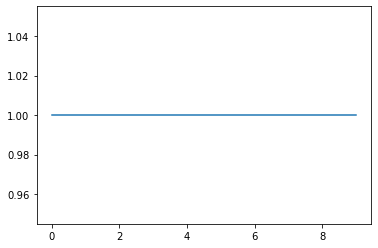

In [82]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])

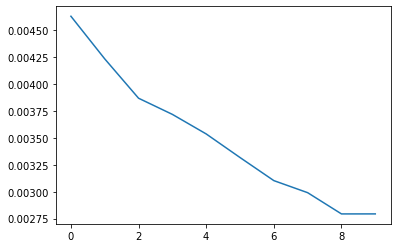

In [83]:
plt.plot(history.history['loss'])